<a href="https://colab.research.google.com/github/lluisdn/TFM/blob/Additional/Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras.models import Model
from keras.layers import Input, Dense, Flatten, Conv2D
from keras.datasets import mnist
import numpy as np

In [ ]:
#Data:
tf.keras.datasets.mnist.load_data(path="mnist.npz")
(x_train, y_train), (x_test, y_test)  = keras.datasets.mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0
x_train = x_train.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)

print(x_test.shape)

11490434/11490434 [==============================] - 0s 0us/step
(10000, 784)


In [ ]:
#Plot
def print_image(index):
  plt.imshow(x_train[index].reshape(28, 28))
  plt.title(y_train[index])
  plt.show()

# **Autoencoder**



784 ---> 100 ---> 50 ---> 20 ---> 2 ---> 100 ---> 100 ---> 784





In [ ]:
#Input data
input_data = Input(shape=(784,))

#Autoencoder
    #Dimensionality reduction
layer_2 = Dense(100, activation='relu')(input_data)
layer_3 = Dense(50, activation='relu')(layer_2)
layer_4 = Dense(20, activation='relu')(layer_3)
layer_5 = Dense(2, activation='relu')(layer_4)

    #Dimensionality augmentation
layer_6 = Dense(100, activation='relu')(layer_5)
layer_7 = Dense(100, activation='relu')(layer_6)
output = Dense(784, activation='sigmoid')(layer_7)

#We need a sigmoid in the last layer, each of them is a pixel of the new picture.


#Create a model:
autoencoder  = Model(inputs=input_data, outputs = [output])

#Compile
autoencoder.compile(optimizer='Adam', loss='mean_squared_error', metrics= 'accuracy')

#Plot the model
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 20)                1020      
                                                                 
 dense_3 (Dense)             (None, 2)                 42        
                                                                 
 dense_4 (Dense)             (None, 100)               300       
                                                                 
 dense_5 (Dense)             (None, 100)               10100 

In [ ]:
#Fitting
autoencoder.fit(x_train, x_train,
                epochs=10,
                #shuffle=True,
                #validation_data=(x_test, x_test)
                )
#Predictions
results=autoencoder.predict(x_test)

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0389 - accuracy: 0.0146
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0386 - accuracy: 0.0148
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0386 - accuracy: 0.0140
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0384 - accuracy: 0.0139
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0383 - accuracy: 0.0135
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0380 - accuracy: 0.0136
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0379 - accuracy: 0.0132
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0378 - accuracy: 0.0133
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0377 - accuracy: 0.0128
Epoch 10/10
313/313 [==============================] - 1s 2ms/step


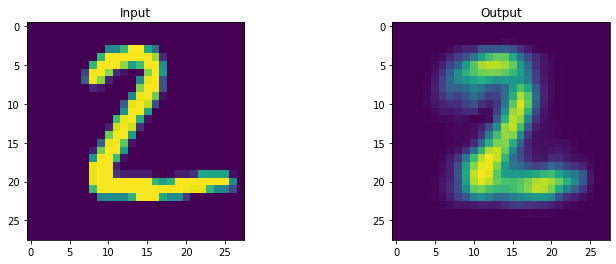

In [ ]:
#Plot of the initial and final pictures:
number=1
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].imshow(x_test[number].reshape(28, 28))
ax[0].set_title('Input')
ax[1].imshow(results[number].reshape(28, 28))
ax[1].set_title('Output')
plt.show()

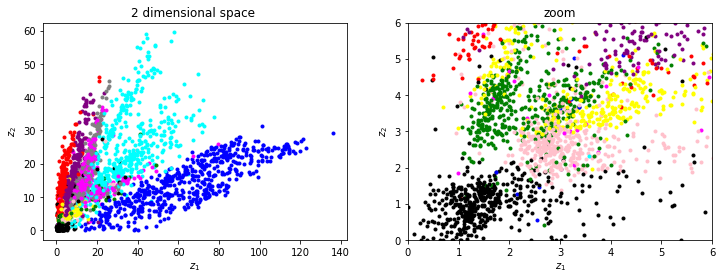

In [ ]:
# Obtain a reference to the input layer
input_layer = autoencoder.input

# Obtain a reference to the desired output layer
layer_5_results = autoencoder.layers[4].output

# Create a new model that reuses the trained layers
encoding = Model(inputs=input_layer, outputs=layer_5_results)

# Get the activations of the desired layer
activations_test = encoding.predict(x_test, verbose=0)
activations_train = encoding.predict(x_train,  verbose=0)# For the classifier

#Plotting
numbers=np.linspace(0,9,10)
colors = ['red', 'blue', 'black', 'green', 'grey', 'yellow', 'purple', 'cyan','pink', 'magenta']
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
for i in range(5000):
    for j in range(len(numbers)):
        if y_test[i]==j:
            ax[0].plot(activations_test[i,0],activations_test[i,1],'.', color=colors[j])

for i in range(5000):
    for j in range(len(numbers)):
        if y_test[i]==j:
            ax[1].plot(activations_test[i,0],activations_test[i,1],'.', color=colors[j])

ax[1].set_xlim([0, 6])
ax[1].set_ylim([0, 6])

ax[0].set_xlabel(r'$z_1$')
ax[0].set_ylabel(r'$z_2$')
ax[1].set_xlabel(r'$z_1$')
ax[1].set_ylabel(r'$z_2$')
ax[0].set_title('2 dimensional space ')
ax[1].set_title('zoom')
plt.show()

#Falta la llegenda....
#colors = ['red', 'blue', 'black', 'green', 'grey', 'yellow', 'purple', 'cyan','pink', 'magenta']
#Numbers= [0    , 1     , 2       , 3     , 4     , 5       , 6       , 7     , 8     , 9       ]

# **Classifier**

2 ---> 100 ---> 100 ---> 10

In [ ]:
#Input data
input_data_classifier = Input(shape=(2))

#Classifier ---> (100-10)
layer_2class = Dense(100, activation='relu')(input_data_classifier)
layer_3class = Dense(100, activation='relu')(layer_2class)
output = Dense(10, activation='softmax')(layer_3class)

#Create a model:
classifier  = Model(inputs=input_data_classifier, outputs = output)

#Compile
classifier.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics= 'accuracy')

#Plot the model
classifier.summary()

Model: "model_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_16 (InputLayer)       [(None, 2)]               0         
                                                                 
 dense_18 (Dense)            (None, 100)               300       
                                                                 
 dense_19 (Dense)            (None, 100)               10100     
                                                                 
 dense_20 (Dense)            (None, 10)                1010      
                                                                 
Total params: 11,410
Trainable params: 11,410
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Fitting
classifier.fit(activations_train, y_train,
                epochs=10,
                #shuffle=True,
                #validation_data=(x_test, x_test)
                )


Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8801 - accuracy: 0.7049
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6684 - accuracy: 0.7723
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6410 - accuracy: 0.7775
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6256 - accuracy: 0.7833
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6154 - accuracy: 0.7849
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6092 - accuracy: 0.7858
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6037 - accuracy: 0.7873
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5997 - accuracy: 0.7889
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5959 - accuracy: 0.7898
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.593

In [ ]:
#Evaluation
test_loss, test_acc = classifier.evaluate(activations_test,  y_test)
print('Test accuracy:', test_acc)


313/313 [==============================] - 2s 3ms/step - loss: 0.5930 - accuracy: 0.7921
Test accuracy: 0.7921000123023987


# **Generator of numbers**


313/313 [==============================] - 1s 2ms/step


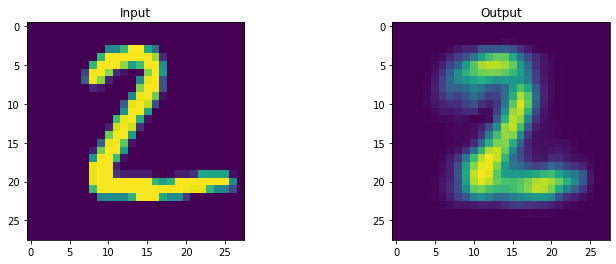

array([[46.166718 , 31.526737 ],
       [ 2.144924 ,  1.1704544],
       [73.17653  ,  9.589769 ],
       ...,
       [12.335218 , 10.89015  ],
       [ 9.007879 ,  4.9107337],
       [ 5.7288303, 11.049158 ]], dtype=float32)

In [ ]:
# Obtain a reference to the input layer
input_layer = autoencoder.layers[4].output

# Obtain a reference to the desired output layer
layer_output_results = autoencoder.layers[7].output

# Create a new model that reuses the trained layers
decoding = Model(inputs=input_layer, outputs=layer_output_results)

# Get the activations of the desired layer
images = decoding.predict(activations_test)

number=1
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].imshow(x_test[number].reshape(28, 28))
ax[0].set_title('Input')
ax[1].imshow(images[number].reshape(28, 28))
ax[1].set_title('Output')
plt.show()

#The same result is obtained, it works!!!! Now we can generate numbers from only two inputs
activations_test

1/1 [==============================] - 0s 41ms/step


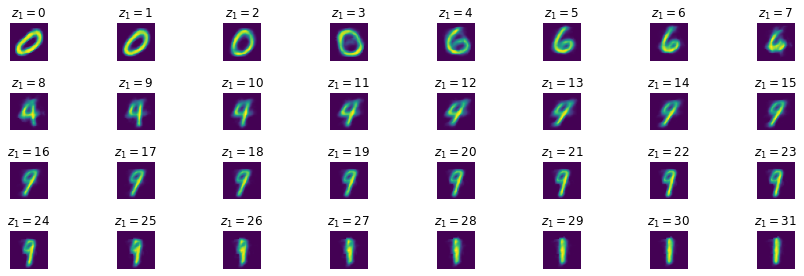

In [ ]:
#choose two values:
z2=10
generated_values=[]
for i in range(32):
  generated_values.append([i,z2])

generated_image = decoding.predict(generated_values)


dim=4

fig, ax = plt.subplots(dim, int(len(generated_image)/dim), figsize=(12, 4))
fig.tight_layout()
for k in range(dim):
  for i in range(int(len(generated_image)/dim)):
    ax[k,i].imshow(generated_image[i+k*int(len(generated_image)/dim)].reshape(28, 28))
    ax[k,i].axis('off')
    ax[k,i].set_title('$z_1=$'+ str(generated_values[i+k*int(len(generated_image)/dim)][0]))
plt.show()

# **Not Relu functions**

In [ ]:
#Tanh --> NO
#Linear --> SI
#Leaky ReLU -->SI

#Input data
input_data = Input(shape=(784,))

#Autoencoder
    #Dimensionality reduction
layer_2 = Dense(100, activation='relu')(input_data)
layer_3 = Dense(50, activation='relu')(layer_2)
layer_4 = Dense(20, activation='relu')(layer_3)
layer_5 = Dense(2, activation='linear')(layer_4)

    #Dimensionality augmentation
layer_6 = Dense(100, activation='relu')(layer_5)
layer_7 = Dense(100, activation='relu')(layer_6)
output = Dense(784, activation='sigmoid')(layer_7)

#We need a sigmoid in the last layer, each of them is a pixel of the new picture.


#Create a model:
autoencoder  = Model(inputs=input_data, outputs = [output])

#Compile
autoencoder.compile(optimizer='Adam', loss='mean_squared_error', metrics= 'accuracy')

#Plot the model
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 20)                1020      
                                                                 
 dense_3 (Dense)             (None, 2)                 42        
                                                                 
 dense_4 (Dense)             (None, 100)               300       
                                                                 
 dense_5 (Dense)             (None, 100)               10100 

313/313 [==============================] - 1s 2ms/step


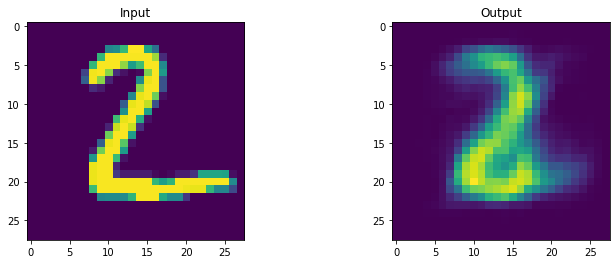

In [ ]:
#Fitting
autoencoder.fit(x_train, x_train,
                epochs=10, verbose= 0,
                #shuffle=True,
                #validation_data=(x_test, x_test)
                )
#Predictions
results=autoencoder.predict(x_test)

#Plot of the initial and final pictures:
number=1
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].imshow(x_test[number].reshape(28, 28))
ax[0].set_title('Input')
ax[1].imshow(results[number].reshape(28, 28))
ax[1].set_title('Output')
plt.show()

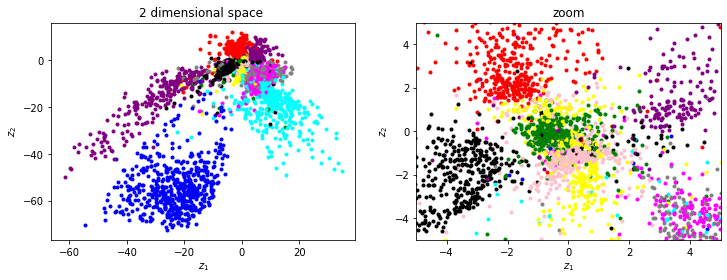

In [ ]:
# Obtain a reference to the input layer
input_layer = autoencoder.input

# Obtain a reference to the desired output layer
layer_5_results = autoencoder.layers[4].output

# Create a new model that reuses the trained layers
encoding = Model(inputs=input_layer, outputs=layer_5_results)

# Get the activations of the desired layer
activations_test = encoding.predict(x_test, verbose=0)
activations_train = encoding.predict(x_train,  verbose=0)# For the classifier

#Plotting
numbers=np.linspace(0,9,10)
colors = ['red', 'blue', 'black', 'green', 'grey', 'yellow', 'purple', 'cyan','pink', 'magenta']
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
for i in range(5000):
    for j in range(len(numbers)):
        if y_test[i]==j:
            ax[0].plot(activations_test[i,0],activations_test[i,1],'.', color=colors[j])

for i in range(5000):
    for j in range(len(numbers)):
        if y_test[i]==j:
            ax[1].plot(activations_test[i,0],activations_test[i,1],'.', color=colors[j])

ax[1].set_xlim([-5, 5])
ax[1].set_ylim([-5, 5])

ax[0].set_xlabel(r'$z_1$')
ax[0].set_ylabel(r'$z_2$')
ax[1].set_xlabel(r'$z_1$')
ax[1].set_ylabel(r'$z_2$')
ax[0].set_title('2 dimensional space ')
ax[1].set_title('zoom')
plt.show()

#Falta la llegenda....

# **Adding convolutional/pooling layers (classifier)**

LeNet architecture:

Comparison_image_neural_networks (1).svg

In [ ]:
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten


# Input layer
input_data = Input(shape=(28, 28, 1))

# Convolutional layer
layer_1 = Conv2D(6, kernel_size=(5, 5), activation='sigmoid', padding='same')(input_data) #same /valid

# Max Pooling
layer_2 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(layer_1)

# Convolutional layer
layer_3 = Conv2D(16, kernel_size=(5, 5), activation='sigmoid')(layer_2)

# Max Pooling
layer_4 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(layer_3)

# Flatten the data
layer_5 = Flatten()(layer_4)

# Fully Connected Layers
layer_6 = Dense(120, activation='sigmoid')(layer_5)
layer_7 = Dense(84, activation='sigmoid')(layer_6)
output = Dense(10, activation='softmax')(layer_7)

# Compile the model
lenet = Model(inputs=input_data, outputs=output)
lenet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#Plot the model
lenet.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 400)               0     

In [ ]:
#X_train/test reshape
x_train_2 = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test_2 = x_test.reshape(x_test.shape[0], 28, 28, 1)




In [ ]:
#Hot encoded array:
def target_matrix(target):
    target_matrix=np.zeros((len(target),10))
    target_matrix[np.arange(target.size),target ] = 1
    return target_matrix

y_train_2=target_matrix(y_train)
y_test_2=target_matrix(y_test)

In [ ]:
#Fitting
lenet.fit(x_train_2, y_train_2,
                epochs=5,
                #shuffle=True,
                )
# Predictions
results=lenet.predict(x_test_2)

Epoch 1/5
1875/1875 [==============================] - 48s 26ms/step - loss: 0.0336 - accuracy: 0.9896
Epoch 2/5
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0302 - accuracy: 0.9908
Epoch 3/5
1875/1875 [==============================] - 44s 23ms/step - loss: 0.0266 - accuracy: 0.9914
Epoch 4/5
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0230 - accuracy: 0.9926
Epoch 5/5
313/313 [==============================] - 3s 8ms/step


In [ ]:
test_loss, test_acc = lenet.evaluate(x_test_2,  y_test_2)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)
results_cnn=lenet.predict(x_test_2)

313/313 [==============================] - 3s 9ms/step - loss: 0.0355 - accuracy: 0.9881
Test accuracy: 0.988099992275238
Test loss: 0.03546246513724327
313/313 [==============================] - 4s 12ms/step


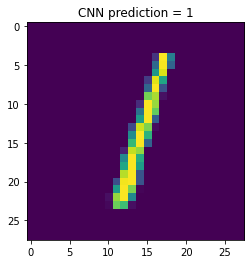

In [ ]:
num=2
#Plot
def print_image(index):
  plt.imshow(x_test_2[index].reshape(28, 28))
  plt.title('CNN prediction = '+ str(np.argmax(results_cnn[num])))
  plt.show()

print_image(num)

In [ ]:
import numpy as np
from keras.layers import Input, Dense, Lambda
from keras.models import Model
from keras.datasets import mnist
from keras import backend as K
from keras import metrics

# Load MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

# Preprocessing
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Define the input shape
input_shape = (784, )

# Define the dimensionality of the latent space
latent_dim = 2

# Define the encoder architecture
inputs = Input(shape=input_shape, name='encoder_input')
x = Dense(512, activation='relu')(inputs)
x = Dense(256, activation='relu')(x)

# Define the mean and variance layers
z_mean = Dense(latent_dim, name='z_mean')(x)
z_log_var = Dense(latent_dim, name='z_log_var')(x)

# Define the sampling function
def sampling(args):
    z_mean, z_log_var = args
    epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dim), mean=0., stddev=1.)
    return z_mean + K.exp(0.5 * z_log_var) * epsilon

# Use the sampling function to get a sample from the latent space
z = Lambda(sampling, output_shape=(latent_dim,), name='z')([z_mean, z_log_var])

# Define the decoder architecture
decoder_inputs = Input(shape=(latent_dim,), name='decoder_input')
x = Dense(256, activation='relu')(decoder_inputs)
x = Dense(512, activation='relu')(x)
outputs = Dense(784, activation='sigmoid')(x)

# Define the encoder and decoder models
encoder = Model(inputs, [z_mean, z_log_var, z], name='encoder')
decoder = Model(decoder_inputs, outputs, name='decoder')

# Define the VAE model
outputs = decoder(encoder(inputs)[2])
vae = Model(inputs, outputs, name='vae')

# Define the loss function
reconstruction_loss = metrics.binary_crossentropy(inputs, outputs)
reconstruction_loss *= 784
kl_loss = 1 + z_log_var - K.square(z_mean) - K.exp(z_log_var)
kl_loss = K.sum(kl_loss, axis=-1)
kl_loss *= -0.5
vae_loss = K.mean(reconstruction_loss + kl_loss)
vae.add_loss(vae_loss)

# Compile the model
vae.compile(optimizer='adam')

# Train the model
vae.fit(x_train, epochs=5, batch_size=128, validation_data=(x_test, None))


11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/50
469/469 [==============================] - 31s 59ms/step - loss: 185.0242 - val_loss: 166.2986
Epoch 2/50
469/469 [==============================] - 13s 28ms/step - loss: 161.9201 - val_loss: 158.7565
Epoch 3/50
469/469 [==============================] - 13s 27ms/step - loss: 156.7776 - val_loss: 155.4673
Epoch 4/50
469/469 [==============================] - 13s 27ms/step - loss: 153.7434 - val_loss: 152.7278
Epoch 5/50
469/469 [==============================] - 13s 27ms/step - loss: 151.3360 - val_loss: 150.5538
Epoch 6/50
469/469 [==============================] - 13s 28ms/step - loss: 149.6323 - val_loss: 149.4767
Epoch 7/50
469/469 [==============================] - 14s 29ms/step - loss: 148.1035 - val_loss: 148.2757
Epoch 8/50
469/469 [==============================] - 13s 27ms/step - loss: 146.9352 - val_loss: 147.0829
Epoch 9/50
469/469 [==============================] - 13s 27ms/step - loss: 146.0350 - 